#### Import Packages

In [1]:
#import warning
import warnings
warnings.filterwarnings('ignore')

#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tqdm
import nltk

#### Import Dataset

In [2]:
train = pd.read_csv('./Dataset/nlp-getting-started/train.csv')
test = pd.read_csv('./Dataset/nlp-getting-started/test.csv')
sample_sub = pd.read_csv('./Dataset/nlp-getting-started/sample_submission.csv')

#### Checking Dataset

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
sample_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [6]:
#simple summary
def simple_eda(df):
    print("summary")
    print("------------------------------")
    print(df.describe())
    print("------------------------------")
    print("columns types")
    print(df.dtypes)
    print("------------------------------")
    print("missing values")
    print(df.isna().sum())
    print("------------------------------")
    print("duplicated values")
    print(df.duplicated().any())
    print("------------------------------")
    print("shape")
    print(df.shape)

In [7]:
simple_eda(train)

summary
------------------------------
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
------------------------------
columns types
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object
------------------------------
missing values
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
------------------------------
duplicated values
False
------------------------------
shape
(7613, 5)


In [8]:
simple_eda(test)

summary
------------------------------
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000
------------------------------
columns types
id           int64
keyword     object
location    object
text        object
dtype: object
------------------------------
missing values
id             0
keyword       26
location    1105
text           0
dtype: int64
------------------------------
duplicated values
False
------------------------------
shape
(3263, 4)


In [9]:
train['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [10]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

#### Data Visualization

Text(0.5, 1.0, 'Tweet target countplot')

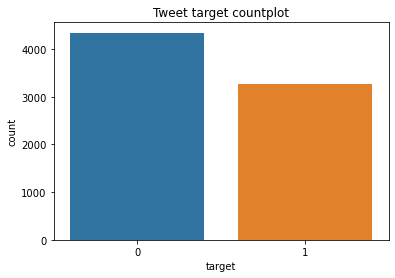

In [11]:
sns.countplot(train['target'])
plt.title('Tweet target countplot')

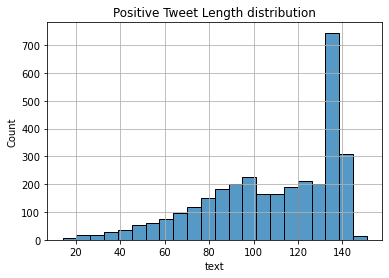

In [12]:
sns.histplot( train[train['target']==1]['text'].str.len())
plt.title('Positive Tweet Length distribution')
plt.grid()

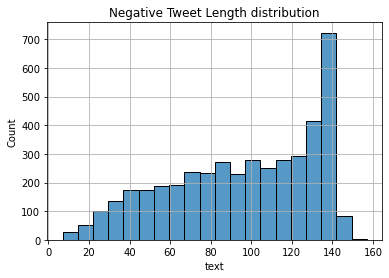

In [13]:
sns.histplot( train[train['target']==0]['text'].str.len())
plt.title('Negative Tweet Length distribution')
plt.grid()

#### Data Clearing

In [14]:
#english stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_eng = set(stopwords.words("english"))
stop_eng

[nltk_data] Downloading package stopwords to C:\Users\Arkaan
[nltk_data]     Ah'naf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
#remove non alphabets
train['text'] = train['text'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

#remove punctuations
train['text'] = train['text'].apply(lambda x: re.sub('[<>=,\.!?:()"]', '', x))

#remove html tag (<.....>)
train['text'] = train['text'].apply(lambda x: re.sub('<.*?>', ' ', x))
train['text'] = train['text'].apply(lambda x: re.sub('br', ' ', x))

#lower case
train['text'] = train['text'].apply(lambda x: x.lower())

#remove stop words
train['text'] = train['text'].apply(lambda x : [i for i in x.split() if i not in stop_eng])

In [16]:
#changing to function
def manipulate_text(df):
    #remove non alphabets
    df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

    #remove punctuations
    df['text'] = df['text'].apply(lambda x: re.sub('[<>=,\.!?:()"]', '', x))

    #remove html tag (<.....>)
    df['text'] = df['text'].apply(lambda x: re.sub('<.*?>', ' ', x))
    df['text'] = df['text'].apply(lambda x: re.sub('br', ' ', x))

    #lower case
    df['text'] = df['text'].apply(lambda x: x.lower())

    #remove stop words
    df['text'] = df['text'].apply(lambda x : [i for i in x.split() if i not in stop_eng])

In [17]:
train.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
5,8,NaN,NaN,"[rockyfire, update, california, hwy, closed, d...",1
6,10,NaN,NaN,"[flood, disaster, heavy, rain, causes, flash, ...",1
7,13,NaN,NaN,"[top, hill, see, fire, woods]",1
8,14,NaN,NaN,"[emergency, evacuation, happening, building, a...",1
9,15,NaN,NaN,"[afraid, tornado, coming, area]",1


#### Tokenization

In [18]:
X = train['text']

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
token = Tokenizer(lower = False)
token.fit_on_texts(train['text'])

#### Transforms each text in texts to a sequence of integers.

In [21]:
X = token.texts_to_sequences(train['text'])

#### Padding Sequences

In [22]:
def get_max_length():
    review_length = []
    for review in train['text']:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X,
                maxlen=get_max_length(),
                padding='post',
                truncating='post')

In [24]:
X

array([[ 4601,   731,   173, ...,     0,     0,     0],
       [  117,     6,   148, ...,     0,     0,     0],
       [ 1599,  1469,  1791, ...,  1258,   960,     0],
       ...,
       [  612,   487,   440, ...,     0,     0,     0],
       [   20,   995,    29, ...,  2197,  2357,  3998],
       [  134,   130,   421, ...,     1, 21958, 21959]])

In [25]:
X[0]

array([4601,  731,  173,   75, 1468, 4602,   24,    0,    0,    0,    0,
          0])

In [26]:
token.sequences_to_texts([[ 4601,  731,  173,   75, 1468, 4602,   24]])

['deeds reason earthquake may allah forgive us']

#### Data Splitting

In [27]:
y = train['target']

In [28]:
X

array([[ 4601,   731,   173, ...,     0,     0,     0],
       [  117,     6,   148, ...,     0,     0,     0],
       [ 1599,  1469,  1791, ...,  1258,   960,     0],
       ...,
       [  612,   487,   440, ...,     0,     0,     0],
       [   20,   995,    29, ...,  2197,  2357,  3998],
       [  134,   130,   421, ...,     1, 21958, 21959]])

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
#splitting data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6090, 12), (1523, 12), (6090,), (1523,))

#### Model Building

In [31]:
#import packages for model building
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [32]:
#define total_words
total_words = len(token.word_index) + 1
total_words

21960

In [33]:
#model building
model = Sequential()
model.add(Embedding(total_words, 150, input_length = get_max_length()))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(10))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr = 0.0001), 
              metrics=['accuracy'])

#model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 150)           3294000   
                                                                 
 lstm (LSTM)                 (None, 12, 100)           100400    
                                                                 
 dropout (Dropout)           (None, 12, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            30200     
                                                                 
 dropout_1 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0

#### Model Fitting and Evaluate

In [34]:
#define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_loss = EarlyStopping(monitor='val_loss', 
                        mode='min', 
                        verbose=1, 
                        patience=1)

mc = ModelCheckpoint('tweetmodel/best_model.h5', 
                     monitor='val_loss', 
                     mode='min', 
                     save_best_only=True)

In [35]:
#model fitting
history = model.fit(X_train, 
          y_train, 
          batch_size = 64, 
          validation_split = 0.2,
          epochs = 30, 
          callbacks=[es_loss, mc])

Epoch 1/30
77/77 [==============================] - 11s 86ms/step - loss: 0.6874 - accuracy: 0.5589 - val_loss: 0.6773 - val_accuracy: 0.5616
Epoch 2/30
77/77 [==============================] - 6s 73ms/step - loss: 0.6478 - accuracy: 0.6051 - val_loss: 0.5995 - val_accuracy: 0.7258
Epoch 3/30
77/77 [==============================] - 5s 69ms/step - loss: 0.5073 - accuracy: 0.8329 - val_loss: 0.5489 - val_accuracy: 0.7438
Epoch 4/30
77/77 [==============================] - 5s 70ms/step - loss: 0.3904 - accuracy: 0.8982 - val_loss: 0.5567 - val_accuracy: 0.7397
Epoch 4: early stopping


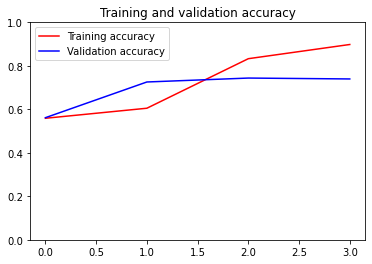

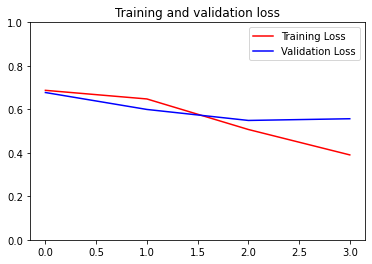

In [36]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim([0,1])
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylim([0,1])
plt.legend()
plt.show()

#### Predict validation Data

In [37]:
y_pred = model.predict(y_val).round()

#### Predict Test Data

In [38]:
manipulate_text(test)
test.head()

,id,keyword,location,text
0,0,NaN,NaN,"[happened, terrible, car, crash]"
1,2,NaN,NaN,"[heard, earthquake, different, cities, stay, s..."
2,3,NaN,NaN,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,"[typhoon, soudelor, kills, china, taiwan]"


In [39]:
X_test = token.texts_to_sequences(test['text'])

In [40]:
X_test = pad_sequences(X_test,
                maxlen=get_max_length(),
                padding='post',
                truncating='post')
X_test

array([[  778,  1813,    66, ...,     0,     0,     0],
       [  383,   173,  1054, ...,     0,     0,     0],
       [  117,     6,   692, ...,     0,     0,     0],
       ...,
       [  828,   564,   267, ...,     0,     0,     0],
       [ 6308,   496,   342, ..., 15462,     0,     0],
       [ 5998,  2755,  1460, ...,     0,     0,     0]])

In [41]:
prediction = model.predict(X_test).round().flatten()
prediction

array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)

#### Submission

In [42]:
disaster_tweet = pd.DataFrame({'id':sample_sub.id, 'target': prediction})
disaster_tweet['target'] = disaster_tweet['target'].astype('int') 
disaster_tweet

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [43]:
disaster_tweet.to_csv('disaster_tweet.csv',index=False)

In [44]:
disaster_tweet.dtypes

id        int64
target    int32
dtype: object